### Input: CIF File

Characterize the asymmetry of the CuFeS2 system

In [1]:
from pymatgen.analysis.local_env import CrystalNN
from pymatgen.core import Structure

import numpy as np

In [5]:
cif = "CuFeS2.cif"

# load structure file
structure = Structure.from_file(cif)
print(structure)

Full Formula (Fe4 Cu4 S8)
Reduced Formula: FeCuS2
abc   :   5.289000   5.289000  10.423000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (16)
  #  SP         a       b      c
---  ----  ------  ------  -----
  0  Fe    0       0       0.5
  1  Fe    0.5     0.5     0
  2  Fe    0.5     0       0.25
  3  Fe    0       0.5     0.75
  4  Cu    0       0       0
  5  Cu    0.5     0.5     0.5
  6  Cu    0.5     0       0.75
  7  Cu    0       0.5     0.25
  8  S     0.2574  0.25    0.125
  9  S     0.7574  0.75    0.625
 10  S     0.25    0.7426  0.875
 11  S     0.75    0.2426  0.375
 12  S     0.7426  0.75    0.125
 13  S     0.2426  0.25    0.625
 14  S     0.75    0.2574  0.875
 15  S     0.25    0.7574  0.375


In [6]:
# Create a CrystalNN object for finding neighbors
nn = CrystalNN(distance_cutoffs = None)

bond_lengths = []
bond_angles = []
neighbor_vectors = []

# atom index in structure
site_index = 0

neighbors = nn.get_nn(structure, site_index)
print(f"Neighbors of atom at site {site_index}, {structure.species[site_index]}")
for neighbor in neighbors:
    print(neighbor)

c_atom = structure[site_index] # Central atom

def angle_between_vecs(v1, v2):
    v1 = v1/np.linalg.norm(v1)
    v2 = v2/np.linalg.norm(v2)
    angle = np.arccos(np.round(np.dot(v1, v2),6))/np.pi*180.0
    return angle

unique_comparisons = []
for atom1 in neighbors:
    for atom2 in neighbors:
        if (atom1, atom2) in unique_comparisons or (atom2, atom1) in unique_comparisons:
            pass
        elif not (atom1 == atom2):
            v1 = (c_atom.coords-atom1.coords)/np.linalg.norm(c_atom.coords-atom1.coords)
            v2 = (c_atom.coords-atom2.coords)/np.linalg.norm(c_atom.coords-atom2.coords)
            angle = angle_between_vecs(v1, v2)
            bond_angles.append(np.round(angle,6))
            
            unique_comparisons.append((atom1, atom2))
    
    bond_lengths.append(np.round(np.linalg.norm(c_atom.coords-atom1.coords),6))
    neighbor_vectors.append(np.round(c_atom.coords-atom1.coords,6))

anisotropic_vec = np.sum([np.abs(x) for x in neighbor_vectors], axis=0)
anisotropic_vec = anisotropic_vec / np.linalg.norm(anisotropic_vec)
isotropic_vec = np.asarray([1,1,1]) / np.linalg.norm(np.asarray([1,1,1]))

# Need x-angle, y-angle, and z-angle of anisotropic_vec with isotropic_vec to 
# describe "how anisotropic" the system is


print("\nBond Angles:", "Total Count")
unique_angles = set(bond_angles)
for angle in unique_angles:
    count = bond_angles.count(angle)
    print(f"{angle}: {count}")

print("\nBond Lengths:", "Total Count")
unique_lengths = set(bond_lengths)
for length in unique_lengths:
    count = bond_lengths.count(length)
    print(f"{length}: {count}")

print(f"\n{structure.species[site_index]} {site_index}, Average Bond Direction:", np.mean(neighbor_vectors,axis=0))

print(f"\nIsotropy Vector:", isotropic_vec)
print(f"{structure.species[site_index]} {site_index}, Anisotropy Vector:", anisotropic_vec)

Neighbors of atom at site 0, Fe
[-1.2831114 -1.32225    6.514375 ] S
[-1.32225    1.2831114  3.908625 ] S
[1.2831114 1.32225   6.514375 ] S
[ 1.32225   -1.2831114  3.908625 ] S

Bond Angles: Total Count
109.469256: 2
109.472173: 4

Bond Lengths: Total Count
2.256591: 4

Fe 0, Average Bond Direction: [0. 0. 0.]

Isotropy Vector: [0.57735027 0.57735027 0.57735027]
Fe 0, Anisotropy Vector: [0.57732153 0.57732153 0.57740773]


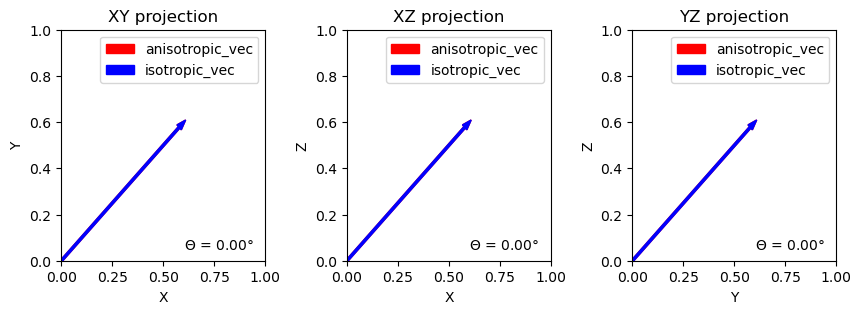

In [7]:
'''
Written using ChatGPT, prompt:
"matplotlib, plot two 3d vectors on the xy, xz, and yz planes. Make each projection a subplot of a single figure, 
and also label the angle between the vectors on each subplot with a little r"$\theta$ = angle" text for the angle
between the two projections. 
The two vectors have variable names "anisotropic_vec" and "isotropic_vec", color them differently, 
and in each subplot, plot them as arrows pointing from the origin of each subplot to their individual directions.
Make sure there are 3 separate 2D subplots."
'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with three subplots, one for each projection
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

arrow_width = 0.01
# Plot the two vectors on each subplot
for i, ax in enumerate(axs):
    if i == 0:
        aniso_arrow = ax.arrow(0, 0, anisotropic_vec[0], anisotropic_vec[1], color='red', width=arrow_width, label='anisotropic_vec')
        iso_arrow = ax.arrow(0, 0, isotropic_vec[0], isotropic_vec[1], color='blue', width=arrow_width, label='isotropic_vec')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        proj_aniso_vec = np.asarray(anisotropic_vec[:2])
        proj_iso_vec = np.asarray(isotropic_vec[:2])
    elif i == 1:
        aniso_arrow = ax.arrow(0, 0, anisotropic_vec[0], anisotropic_vec[2], color='red', width=arrow_width, label='anisotropic_vec')
        iso_arrow = ax.arrow(0, 0, isotropic_vec[0], isotropic_vec[2], color='blue', width=arrow_width, label='isotropic_vec')
        ax.set_xlabel('X')
        ax.set_ylabel('Z')
        proj_aniso_vec = anisotropic_vec[[0,2]]
        proj_iso_vec = isotropic_vec[[0,2]]
    else:
        aniso_arrow = ax.arrow(0, 0, anisotropic_vec[1], anisotropic_vec[2], color='red', width=arrow_width, label='anisotropic_vec')
        iso_arrow = ax.arrow(0, 0, isotropic_vec[1], isotropic_vec[2], color='blue', width=arrow_width, label='isotropic_vec')
        ax.set_xlabel('Y')
        ax.set_ylabel('Z')
        proj_aniso_vec = anisotropic_vec[1:]
        proj_iso_vec = isotropic_vec[1:]
    
    theta = np.round(angle_between_vecs(proj_aniso_vec, proj_iso_vec),2)

    # Add a title to each subplot
    if i == 0:
        ax.set_title('XY projection')
    elif i == 1:
        ax.set_title('XZ projection')
    else:
        ax.set_title('YZ projection')

    # Set the limits of each axis
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # Add a legend to each subplot
    ax.legend()

    # Add angle between the vectors to the plot
    ax.text(0.60, 0.05, f"$\Theta$ = {theta:.2f}$\degree$", transform=ax.transAxes, fontsize=10)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()